In [1]:
%config Completer.use_jedi = False  # enable code auto-completion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("datasets.csv") 
data.drop(['ID','redoxpot2','SMILES'], axis = 1, inplace=True) # drop unrelevant columns
data.rename(columns={"redoxpot1": "redoxpot"})
# show the dataset partially

,HomoA,LumoA,GapA,HomoAH,LumoAH,GapAH,HomoAH2,LumoAH2,GapAH2,redoxpot
0,-7.9848,-3.6582,4.3265,-7.5462,-3.5189,4.0272,-6.0675,-0.4076,5.6599,0.9121
1,-6.6740,-3.3543,3.3197,-6.6104,-3.0729,3.5374,-5.8577,-0.2250,5.6327,0.8415
2,-6.3660,-3.3184,3.0476,-6.2117,-3.0280,3.1837,-5.9100,-0.3589,5.5510,0.8053
3,-7.1440,-3.6882,3.4558,-6.8373,-3.5720,3.2653,-5.9666,-0.4971,5.4694,0.9603
4,-7.5521,-3.5521,4.0000,-7.2218,-3.3578,3.8640,-5.9178,-0.1763,5.7415,0.8734
...,...,...,...,...,...,...,...,...,...,...
1984,-6.9374,-3.0191,3.9184,-6.7611,-3.0876,3.6735,-5.0583,-1.6841,3.3742,0.2191
1985,-7.0019,-3.0019,4.0000,-6.7845,-3.0294,3.7551,-5.0427,-1.6958,3.3470,0.1941
1986,-6.9309,-3.0125,3.9184,-6.7957,-3.0678,3.7279,-5.0055,-1.6313,3.3742,0.3965
1987,-6.8912,-3.0000,3.8912,-6.6754,-3.0291,3.6463,-5.0566,-1.7641,3.2925,0.1937


In [3]:
#!pip install --quiet pandas-profiling # install Pandas Profiling

In [4]:
# Generate the report
#from pandas_profiling import ProfileReport
#prof = ProfileReport(data)
#prof.to_file(output_file='output.html');

In [5]:
# Create the feature and label vectors
X = data.drop(columns = ['redoxpot1']).to_numpy() # features
y = data['redoxpot1'].to_numpy() # label is redox potential

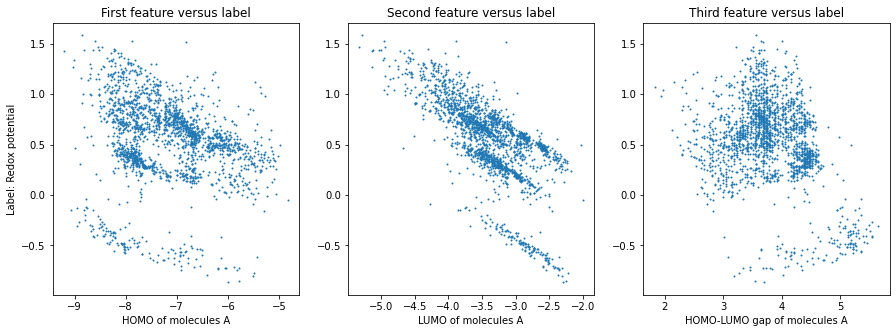

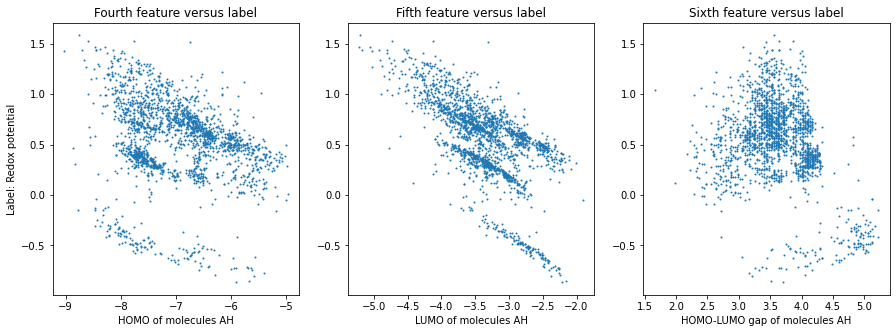

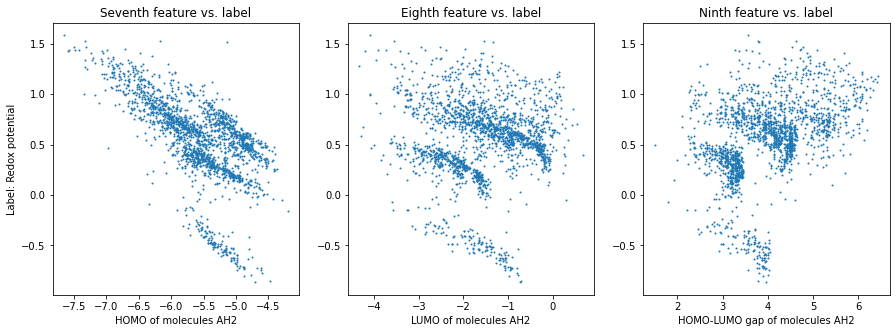

In [6]:
# Visualize data
%matplotlib inline
# Create a figure with 3 subplots in 1 row 
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# Create first subplot 
ax[0].scatter(X[:,0], y, s=1)
ax[0].set_title('First feature versus label')
ax[0].set_xlabel('HOMO of molecules A')
ax[0].set_ylabel('Label: Redox potential')

# Create second subplot 
ax[1].scatter(X[:,1], y, s=1)
ax[1].set_xlabel('LUMO of molecules A')
ax[1].set_title('Second feature versus label')

# Create third subplot 
ax[2].scatter(X[:,2], y, s=1)
ax[2].set_xlabel('HOMO-LUMO gap of molecules A')
ax[2].set_title('Third feature versus label')

# Create another figure with 3 subplots in 1 row
fig1, ax1 = plt.subplots(1, 3, figsize=(15,5))
ax1[0].scatter(X[:,3], y, s=1)
ax1[0].set_xlabel('HOMO of molecules AH')
ax1[0].set_title('Fourth feature versus label')
ax1[0].set_ylabel('Label: Redox potential')

ax1[1].scatter(X[:,4], y, s=1)
ax1[1].set_xlabel('LUMO of molecules AH')
ax1[1].set_title('Fifth feature versus label')

# Create second subplot 
ax1[2].scatter(X[:,5], y, s=1)
ax1[2].set_xlabel('HOMO-LUMO gap of molecules AH')
ax1[2].set_title('Sixth feature versus label')

# Create another figure with 3 subplots in 1 row 
fig2, ax2 = plt.subplots(1, 3, figsize=(15,5))

# Create subplot 
ax2[0].scatter(X[:,6], y, s=1)
ax2[0].set_xlabel('HOMO of molecules AH2')
ax2[0].set_title('Seventh feature vs. label')
ax2[0].set_ylabel('Label: Redox potential')

ax2[1].scatter(X[:,7], y, s=1)
ax2[1].set_xlabel('LUMO of molecules AH2')
ax2[1].set_title('Eighth feature vs. label')

# Create second subplot 
ax2[2].scatter(X[:,8], y, s=1)
ax2[2].set_xlabel('HOMO-LUMO gap of molecules AH2')
ax2[2].set_title('Ninth feature vs. label')

# Display the figure
plt.savefig
plt.show()

In [7]:
# Split the dataset to test set and the remaining (for K-fold Cross-Validation) 
X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Find the best parameters of Decision Tree Regressor with GridSearchCV

In [50]:
parameters = {'criterion': ('squared_error', 'absolute_error'), 'max_depth': list(range(2,11))}  #  a dictionary of parameters 
tree = DecisionTreeRegressor(random_state=42)

grid_cv = GridSearchCV(tree, parameters, cv = 5, scoring='r2', return_train_score=True)  # n_jobs=-1 needed?
grid_cv.fit(X_remain,y_remain)
print(grid_cv.best_params_)  # Parameter setting that gave the best results on the hold out data.

{'criterion': 'squared_error', 'max_depth': 6}


## Errors and R^2 score from Decision Tree Regressor with different tree depths [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and K-fold Cross-Validation

Average training errors for each tree depth:
[0.06948809184115959, 0.05663150191374888, 0.03602025045565117, 0.02557691948961225, 0.01500173649828466, 0.010663045855428191, 0.007459687934589397, 0.00503896435452807, 0.0035243738403954077] 

Average validation errors for each tree depth:
[0.07284682330448233, 0.06262035998580492, 0.0472133724813808, 0.03967464421912324, 0.033322182378877976, 0.03275056049030845, 0.03269517313831745, 0.037221798509843716, 0.033856451638747516] 

Average training R^2 for each tree depth:
[0.5696821170663187, 0.6492885367666028, 0.7770020091258895, 0.8416343424107818, 0.9070367253036208, 0.9338716748508065, 0.9537833089739831, 0.9687925777713481, 0.9781902318757643]
Average validation R^2 for each tree depth:
[0.5473678491044319, 0.610119869144137, 0.7054858813121119, 0.7539310797029887, 0.7937625450028392, 0.7964973627369104, 0.7954255094351573, 0.7675405393971607, 0.7880559876622686]


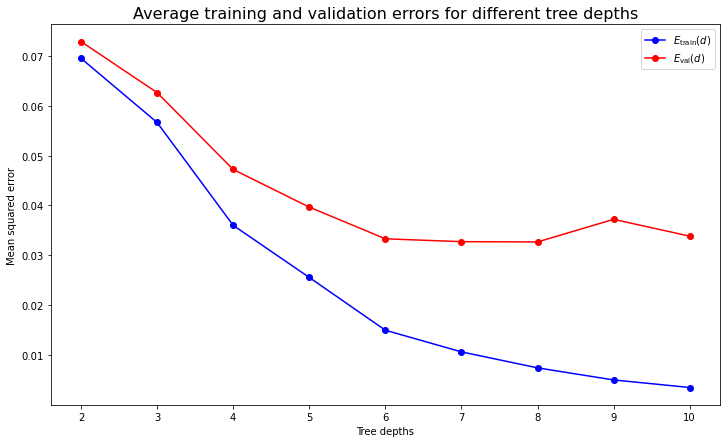

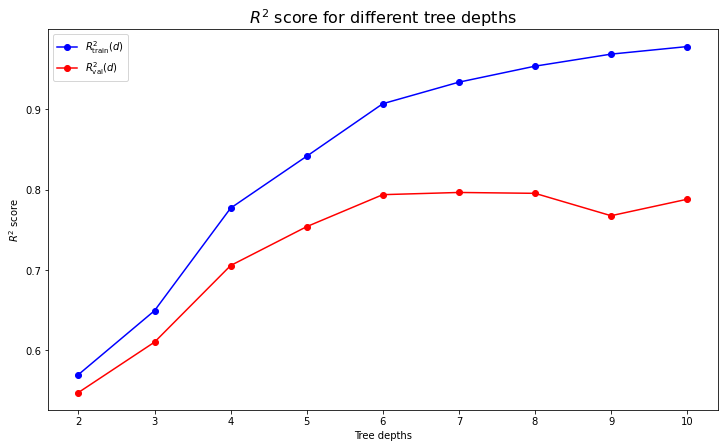

In [53]:
K = 5  # try with the default number of splits of KFold object in sk-learn (5 splits)
kf = KFold(n_splits=K, shuffle=True, random_state=42) # Create a KFold object with K splits

depths = list(range(2,11)) # max tree depths

avg_train_err = [] # average training error for each tree depth
avg_val_err = [] # average validation error for each tree depth

avg_r2_train = [] # average R2 score for training each tree depth
avg_r2_val = []  # average R2 score for validating each tree depth

for d in depths: # try with different max tree depths
    
    err_train_splits = []  # List for storing the training errors for the splits
    err_val_splits = []  # List for storing the validation errors for the splits
    
    r2_train = [] # the R2 score of training for each split
    r2_val = [] # the R2 score of validation for each split
    
    for train_index, val_index in kf.split(X_remain):
        
        X_train, X_val = X_remain[train_index], X_remain[val_index]
        y_train, y_val = y_remain[train_index], y_remain[val_index]
        
        regr = DecisionTreeRegressor(criterion='squared_error', max_depth=d, random_state=42) 
        regr.fit(X_train, y_train) # Fit Decision Tree regression model
        
        y_pred_train = regr.predict(X_train) # predict values for the training data
        train_error = np.mean((y_train - y_pred_train)**2) # mean squared error for training
        err_train_splits.append(train_error)
        r2_train.append(regr.score(X_train, y_train))  # calculate the R2 score of  
        
        y_pred_val = regr.predict(X_val) # predict values for the validation data
        val_error = np.mean((y_val - y_pred_val)**2) # mean squared error for validation
        err_val_splits.append(val_error)
        
        r2_val.append(regr.score(X_val, y_val)) # calculate the R2 score of validation
        
    avg_train_err.append(np.mean(err_train_splits))
    avg_val_err.append(np.mean(err_val_splits))
    
    avg_r2_train.append(np.mean(r2_train)) # average R2 score of each tree depth 
    avg_r2_val.append(np.mean(r2_val))
    
print('Average training errors for each tree depth:')
print(avg_train_err, '\n') # Average training error of k folds for each tree depth

print('Average validation errors for each tree depth:')
print(avg_val_err, '\n') # Average validation error of k folds for each tree depth


print('Average training R^2 for each tree depth:')
print(avg_r2_train)
print('Average validation R^2 for each tree depth:')
print(avg_r2_val)

# Plot the average training and validation errors for each tree depth
plt.figure(figsize=(12,7))
plt.plot(depths, avg_train_err, color='blue', label=r'$E_{\rm train}(d)$', marker='o')  # Plot training error
plt.plot(depths, avg_val_err, color='red', label=r'$E_{\rm val}(d)$', marker='o')  # Plot validation error

plt.title('Average training and validation errors for different tree depths', fontsize=16) # Set title
plt.ylabel('Mean squared error')    # Set label for y-axis
plt.xlabel('Tree depths')         # Set label for x-axis
plt.xticks(depths)      # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

plt.figure(figsize=(12,7))
plt.plot(depths, avg_r2_train, color='blue', label=r'$R^2_{\rm train}(d)$', marker='o')  # Plot training error
plt.plot(depths, avg_r2_val, color='red', label=r'$R^2_{\rm val}(d)$', marker='o')  # Plot validation error

plt.title('$R^2$ score for different tree depths', fontsize=16) # Set title
plt.ylabel('$R^2$ score')    # Set label for y-axis
plt.xlabel('Tree depths')         # Set label for x-axis
plt.xticks(depths)      # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

## Final Test with the test set and tree depth of 6

In [55]:
dst = DecisionTreeRegressor(criterion='squared_error', max_depth = 6, random_state=42)
dst.fit(X_remain, y_remain) # Fit Decision Tree regression model

y_pred_test = dst.predict(X_test) # predict values for the test data
test_error = np.mean((y_test - y_pred_test)**2) # calculate the test error
test_r2 = dst.score(X_test, y_test)

In [56]:
display(test_error, test_r2)

0.02575161003330631

0.844329374802949

## KRR and GridSearchCV

In [42]:
parameters = {'alpha': np.arange(0.5, 3.5, 0.2), 'kernel': ('linear', 'polynomial'), 'degree': [2,3]}  #  a dictionary of parameters for KRR
krr = KernelRidge()

grid_cv = GridSearchCV(krr, parameters, cv = 5, scoring='r2', return_train_score=True) 
grid_cv.fit(X_remain,y_remain)
print(grid_cv.best_params_)  # Parameter setting that gave the best results on the hold out data.

{'alpha': 0.5, 'degree': 3, 'kernel': 'polynomial'}


In [43]:
result_df = pd.DataFrame(grid_cv.cv_results_).sort_values("rank_test_score")[['params', 'mean_train_score', 'mean_test_score']]
result_df['mean_train_score'] = result_df['mean_train_score'].abs()  # for training
result_df['mean_test_score'] = result_df['mean_test_score'].abs()  # for validation

# rename columns
result_df.rename(columns={'params': 'Parameters', 'mean_train_score': 'Mean training score', 'mean_test_score': 'Average validation score'}, inplace=True)
result_df.style.set_properties(subset=['Parameters'], **{'width': '400px'})

,Parameters,Mean training score,Average validation score
3,"{'alpha': 0.5, 'degree': 3, 'kernel': 'polynomial'}",0.828137,0.814869
7,"{'alpha': 0.7, 'degree': 3, 'kernel': 'polynomial'}",0.825552,0.813175
11,"{'alpha': 0.8999999999999999, 'degree': 3, 'kernel': 'polynomial'}",0.823417,0.811650
15,"{'alpha': 1.0999999999999999, 'degree': 3, 'kernel': 'polynomial'}",0.821586,0.810271
19,"{'alpha': 1.2999999999999998, 'degree': 3, 'kernel': 'polynomial'}",0.819982,0.809020
23,"{'alpha': 1.4999999999999998, 'degree': 3, 'kernel': 'polynomial'}",0.818553,0.807877
27,"{'alpha': 1.6999999999999997, 'degree': 3, 'kernel': 'polynomial'}",0.817266,0.806829
31,"{'alpha': 1.8999999999999997, 'degree': 3, 'kernel': 'polynomial'}",0.816095,0.805863
35,"{'alpha': 2.0999999999999996, 'degree': 3, 'kernel': 'polynomial'}",0.815022,0.804968
39,"{'alpha': 2.3, 'degree': 3, 'kernel': 'polynomial'}",0.814032,0.804135


## Final Test with the test set

In [44]:
krr_test = KernelRidge(alpha=0.5, kernel='polynomial', degree=3) # best parameter setting 
#krr_test = grid_cv.best_estimator_

krr_test.fit(X_remain, y_remain)

y_pred_test = krr_test.predict(X_test) # predict values for the test data
test_err = np.mean((y_test - y_pred_test)**2) # calculate the test error
test_r2 = krr_test.score(X_test, y_test) 

display(test_err, test_r2)

0.025446909024549682

0.8461713177521458

## Random Forest Regressor and GridSearchCV

In [16]:
parameters = {'n_estimators': range(110, 190, 20), 'max_depth': list(range(2,11))}  #  a dictionary of parameters
rf = RandomForestRegressor()

grid_cv = GridSearchCV(rf, parameters, cv = 5, scoring='r2', return_train_score=True)  # n_jobs=-1 needed?
grid_cv.fit(X_remain,y_remain)
print(grid_cv.best_params_)  # Parameter setting that gave the best results on the hold out data.

{'max_depth': 10, 'n_estimators': 130}


In [17]:
result_df = pd.DataFrame(grid_cv.cv_results_).sort_values("rank_test_score")[['params', 'mean_train_score', 'mean_test_score']]
result_df['mean_train_score'] = result_df['mean_train_score'].abs()  # take the positive mean_squared_error for training
result_df['mean_test_score'] = result_df['mean_test_score'].abs()  # take the positive mean_squared_error for validation

# rename columns
result_df.rename(columns={'params': 'Parameters', 'mean_train_score': 'Average training error', 'mean_test_score': 'Average validation error'}, inplace=True)
result_df.style.set_properties(subset=['Parameters'], **{'width': '400px'})

,Parameters,Average training error,Average validation error
33,"{'max_depth': 10, 'n_estimators': 130}",0.973237,0.885475
35,"{'max_depth': 10, 'n_estimators': 170}",0.973479,0.885291
32,"{'max_depth': 10, 'n_estimators': 110}",0.973071,0.884965
34,"{'max_depth': 10, 'n_estimators': 150}",0.973402,0.884241
29,"{'max_depth': 9, 'n_estimators': 130}",0.966761,0.883012
31,"{'max_depth': 9, 'n_estimators': 170}",0.967355,0.882918
30,"{'max_depth': 9, 'n_estimators': 150}",0.967430,0.882889
27,"{'max_depth': 8, 'n_estimators': 170}",0.957882,0.882433
28,"{'max_depth': 9, 'n_estimators': 110}",0.966969,0.881794
26,"{'max_depth': 8, 'n_estimators': 150}",0.957649,0.881389


In [18]:
# Final Test with the test set

rf_test = RandomForestRegressor(n_estimators=150, max_depth=10) # best Parameter setting 
rf_test.fit(X_remain, y_remain)

y_pred_test = rf_test.predict(X_test) # predict values for the test data
test_err = np.mean((y_test - y_pred_test)**2) # calculate the test error
test_r2 = rf_test.score(X_test, y_test) 

display(test_err, test_r2)

0.01517042582599434

0.9082935136955078

In [19]:
#print('Average training errors for each tree depth:')
#print(avg_train_err, '\n') # Average training error of k folds for each tree depth

#print('Average validation errors for each tree depth:')
#print(avg_val_err, '\n') # Average validation error of k folds for each tree depth